一、研究主題:如何從現有的CNN標題中，分辨何時的事件會對市場造成負面影響?

二、專案目標:由於脫歐相關新聞中同時包含對股市會造成正面影響及負面影響的資訊，只透過單一關鍵字(brexit)不一定能看出該新聞對市場判斷的影響，因此希望透過數據探勘及機器學習，找出CNN標題常見關鍵字與脫歐事件正負面的關係。
真正能代表脫歐相關新聞中，分別代表正負面事件的常見關鍵詞。

三、研究方式: 透過PYTHON進行資料找尋、整理和分析，用sklearn進行K-means分群分析，並用matplotlib製作出視覺化圖表，最後用t檢定確認結果，以找出真正能代表脫歐相關新聞中，分別代表正負面事件的常見關鍵詞。

四、研究步驟:
1.	設定想研究的資料目標、事件和資料範圍(時間、項目)
2.	透過爬蟲cnn國際版面，找出有重要關鍵字(brexit)的標題
3.	將一整串的標題轉換成單一的詞彙，並找出最常出現的詞彙
4.	人工判定正面及負面詞彙
5.	計算每天正負詞彙量的比例
6.	決定分群數量
7.	用k means分出群
8.	人工找出有發生重要脫歐事件的日期十八個
9.	準備小樣本假設檢定數據
10. 小樣本假設檢定，目前分群是否真足以分出正負面事件?(以負面事件涵蓋率80%為基準，顯著水準為0.05)
11.	結論

1.設定想研究的資料目標、事件和資料範圍(時間、項目)
我希望分辨脫歐新聞對市場的影響，故時間範圍則從脫歐公投開始廣泛宣傳的2016年至今日

2.透過爬蟲cnn國際版面，找出有重要關鍵字(brexit)的標題
從CNN(https://edition.cnn.com/sitemaps/article...)尋找2016/01~2019/04的新聞標題網址，以cnn_loc_list儲存

In [1]:
import sys
import os
import requests, json, csv, datetime
import re
import time
from xlwt import *
import pickle
import requests
from datetime import datetime
from bs4 import BeautifulSoup
cnn_loc_list = []
year_count_list = ["2016",'2017','2018']
month_count_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
spe_2019_month_count_list = ['01','02','03','04']
day_count_list = []
for year in year_count_list:
    for month in month_count_list:
        cnn_url_twse = 'https://edition.cnn.com/sitemaps/article-'+year+'-'+month+'.xml'
        cnn_res = requests.get(cnn_url_twse)
        cnn_res.encoding = "UTF-8"
        cnn_soup = BeautifulSoup(cnn_res.text)
        #print(cnn_soup)
        cnn_loc_list_o = cnn_soup.find_all("loc")
        for l in cnn_loc_list_o:
            cn1 = l.contents[0]
            cnn_loc_list.append(cn1)

for mon in spe_2019_month_count_list:
    cnn_url_twse = 'https://edition.cnn.com/sitemaps/article-2019-'+mon+'.xml'
    cnn_res = requests.get(cnn_url_twse)
    cnn_res.encoding = "UTF-8"
    cnn_soup = BeautifulSoup(cnn_res.text)
    #print(cnn_soup)
    cnn_loc_list_o = cnn_soup.find_all("loc")
    for l in cnn_loc_list_o:
        cn1 = l.contents[0]
        cnn_loc_list.append(cn1)
#print(year,cnn_loc_list)

c:\users\will\appdata\local\programs\python\python36-32\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\will\appdata\local\programs\python\python36-32\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [2]:
import datetime
today = datetime.date.today()
date_list = []
data_size_date = 1180
for i in range(1,data_size_date):
    date = today - datetime.timedelta(days=i)
    date = date.strftime("%Y-%m-%d %H:%M:%S")
    str_date = date[0]+date[1]+date[2]+date[3]+"/"+date[5]+date[6]+"/"+date[8]+date[9]
    date_list.append(str_date)
print(str_date)
brexit_news_list = []
brexit_list_day_dict = {}
brexit_volca_list_day_dict = {}
brexit_pos_neg_volca_list_day_dict = {}
brexit_pos_neg_volca_percentage_dict_p = {}
brexit_pos_neg_volca_percentage_dict_n = {}
brexit_pos_neg_volca_percentage_dict = {}
for j in range(data_size_date-1):
    brexit_volca_list_day_dict[str(date_list[j])] = []
    brexit_pos_neg_volca_list_day_dict[str(date_list[j])] = {'positive':0,'negtive':0}
    brexit_pos_neg_volca_percentage_dict_p[str(date_list[j])] = 0
    brexit_pos_neg_volca_percentage_dict_n[str(date_list[j])] = 0
    brexit_pos_neg_volca_percentage_dict[str(date_list[j])] = []

2016/02/14


3.將一整串的標題轉換成單一的詞彙
將一連串的網址字串轉換成多個詞彙，整理出每天有哪些詞彙

In [3]:
#找出有那些新聞與脫歐有關
brexit_news_list = []
brexit_total_volca_list = []
for addr in cnn_loc_list:
    if 'brexit' in addr:
        brexit_news_list.append(addr)
#print(brexit_news_list)
volca = str()
for addr in brexit_news_list:
    str(addr)
    #print(addr)
    for c in range(12,60):
        c = c*-1
        #print(c)
        addr_alp = addr[c]
        if addr_alp != "/":
            if addr_alp != "-":
                volca += addr_alp
                #print(volca)
            if addr_alp == "-":
                for s in brexit_volca_list_day_dict:
                    if s in addr:
                        volca = volca[::-1]
                        brexit_volca_list_day_dict[s].append(volca)
                        brexit_total_volca_list.append(volca)
                        volca = str()
        if addr_alp == "/":
            break
print(brexit_volca_list_day_dict['2019/04/07'])

['intlhansard', 'gbr', 'gamble', 'brexit', 'may', 'intltheresa', 'gbr', 'brexit', 'mogg', 'rees', 'jacob', 'johnson']


3.找出最常出現的詞彙
使用collections.Counter找出最常出現的四十個關鍵詞

In [4]:
from collections import Counter
brexit_volca_count_list = Counter(brexit_total_volca_list).most_common(40)
brexit_important_volca_count_list =  [key for key, _ in Counter(brexit_total_volca_list).most_common(40)]
print(brexit_volca_count_list)
print(brexit_important_volca_count_list)

[('brexit', 166), ('gbr', 108), ('may', 99), ('intlbrexit', 87), ('intl', 65), ('theresa', 48), ('eu', 38), ('vote', 26), ('deal', 25), ('uk', 21), ('gbrbrexit', 21), ('intltheresa', 20), ('analysis', 20), ('intluk', 18), ('50', 17), ('no', 13), ('referendum', 12), ('britain', 12), ('article', 12), ('bill', 10), ('parliament', 10), ('mcgee', 9), ('what', 8), ('of', 8), ('scli', 8), ('europe', 7), ('brussels', 7), ('delay', 7), ('luke', 7), ('johnson', 6), ('to', 6), ('gbrtheresa', 6), ('is', 6), ('labour', 5), ('eubrexit', 5), ('one', 5), ('brexitbrexit', 5), ('maybrexit', 5), ('court', 5), ('speech', 5)]
['brexit', 'gbr', 'may', 'intlbrexit', 'intl', 'theresa', 'eu', 'vote', 'deal', 'uk', 'gbrbrexit', 'intltheresa', 'analysis', 'intluk', '50', 'no', 'referendum', 'britain', 'article', 'bill', 'parliament', 'mcgee', 'what', 'of', 'scli', 'europe', 'brussels', 'delay', 'luke', 'johnson', 'to', 'gbrtheresa', 'is', 'labour', 'eubrexit', 'one', 'brexitbrexit', 'maybrexit', 'court', 'speech

4.人工判定正面及負面詞彙
先從上述資訊，用人工判定那些可能為正面及負面的關鍵詞，並製作成list

In [5]:
positive_words_list = []
negtive_words_list = []
count_list = []
count_list_num = []
count_list_num_p = []
count_list_num_n = []
count_list_per_p = []
count_list_per_n = []
positive_words_list_1 = [ 'deal', 'intltheresa', 'analysis', 'intluk', 'eu', 'uk','mcgee', 'scli', 'referendum', 'brussels', 'parliament']
negtive_words_list_1 = ['brexit', 'gbr', 'intlbrexit', 'may', 'intl', 'theresa', 'vote', 'gbrbrexit','no','what', 'delay', 'luke', 'europe']

        


5.計算每天正負詞彙量的比例和次數
準備KMEANS分析的資料，統整每天出現的正負詞彙數量，並計算出正負面詞彙分別佔當天重要詞彙的比例

In [6]:
for d in date_list:
    voc_list = brexit_volca_list_day_dict[str(d)]
    pos_num = 0
    neg_num = 0
    percentage_of_d_p = 0
    percentage_of_d_n = 0
    for pos_wo in positive_words_list_1:
        if pos_wo in voc_list:
            pos_num+=1
    for neg_wo in negtive_words_list_1:
        if neg_wo in voc_list:
            neg_num +=1
    if pos_num+neg_num != 0:
        percentage_of_d_p = pos_num/(pos_num+neg_num)
        percentage_of_d_n = neg_num/(pos_num+neg_num)
        count_list.append([percentage_of_d_p,percentage_of_d_n])
        count_list_num.append([pos_num,neg_num])
        count_list_num_p.append(pos_num)
        count_list_num_n.append(neg_num)
        count_list_per_p.append(percentage_of_d_p)
        count_list_per_n.append(percentage_of_d_n)
    else:
        count_list.append([0,0])
        count_list_num.append([0,0])
        count_list_num_p.append(0)
        count_list_num_n.append(0)
        count_list_per_p.append(0)
        count_list_per_n.append(0)
    brexit_pos_neg_volca_percentage_dict_p[str(d)] = percentage_of_d_p
    brexit_pos_neg_volca_percentage_dict_n[str(d)] = percentage_of_d_n
    brexit_pos_neg_volca_percentage_dict[str(d)] = ([percentage_of_d_p,percentage_of_d_n])
#print(brexit_pos_neg_volca_percentage_dict_n)
#print(brexit_pos_neg_volca_percentage_dict)
#print(count_list)    

6.決定分群數量
使用metrics.silhouette_score決定分群數量，可知差異有限但分成十群效果可能最好。然而此處為了方便操作先以三群為試驗。

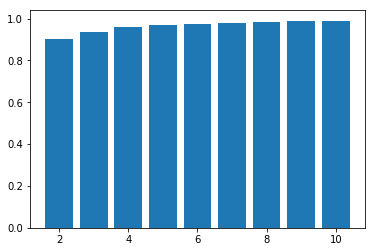

[0.9040654814641875, 0.9349322257118388, 0.9602874358217464, 0.9703935990206162, 0.973345522791878, 0.9775885182957509, 0.9839903238730172, 0.9900327991967183, 0.990234949462478]


In [10]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(count_list)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(count_list, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

In [11]:
from sklearn import cluster, datasets
kmeans_fit = cluster.KMeans(n_clusters = 10).fit(count_list)
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)

分群結果：
[1 1 1 ... 1 1 1]


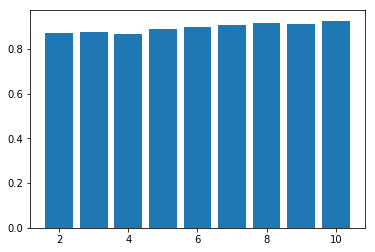

[0.8743736199870801, 0.8747904940626346, 0.8666326380528002, 0.8908794940944141, 0.8972668269353777, 0.9065497591865005, 0.9169475054916849, 0.9140152941315031, 0.9272178136025625]
分群結果：
[0 0 0 ... 0 0 0]


In [12]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(count_list_num)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(count_list_num, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)
from sklearn import cluster, datasets
kmeans_fit = cluster.KMeans(n_clusters = 10).fit(count_list_num)
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)

7.用k means分出群
用sklearn.cluster.KMeans，以各天正負關鍵詞比例及數量XY軸，將日期分成三群，並視覺化分群

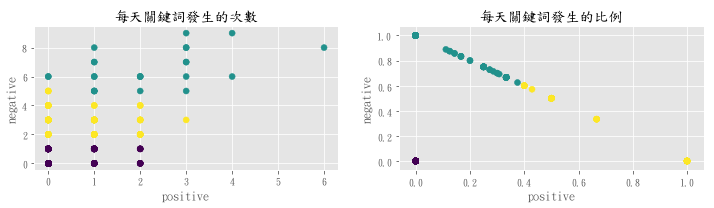

[0 0 0 ... 0 0 0]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, metrics
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(12, 9))
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
ax1 = plt.subplot(3,2,1)  #子圖們
#第一行第二列图形
ax2 = plt.subplot(3,2,2)
plt.sca(ax1)
y_pred_num = cluster.KMeans(n_clusters=3).fit_predict(count_list_num)
plt.title('每天關鍵詞發生的次數')
plt.xlabel('positive')
plt.ylabel('negative')
plt.scatter(count_list_num_p, count_list_num_n,c=y_pred_num)
plt.sca(ax2)
y_pred_per = cluster.KMeans(n_clusters=3).fit_predict(count_list)
plt.title('每天關鍵詞發生的比例')
plt.xlabel('positive')
plt.ylabel('negative')
plt.scatter(count_list_per_p, count_list_per_n,c=y_pred_per)
plt.show()
print(y_pred_per)

8.人工找出有發生重要脫歐事件的日期十八個
由於K means為非監督，故從已知資訊中找尋檢查方式
透過https://www.macromicro.me/time_line?id=13&stat=561 找出18個會影響到股市的重要日期，作為檢查

In [14]:
real_negative_date_list = ['2016/02/18','2016/06/23','2016/06/24','2016/06/13','2017/01/17','2017/02/02','2017/02/24','2017/06/08','2017/11/29','2018/07/09','2019/03/06','2019/01/29']
real_positive_date_list = ['2017/03/13','2017/03/29','2017/06/19','2017/12/08','2017/12/15','2018/09/19']   

9.準備小樣本假設檢定數據
整理出母體中各群中的日期，並視覺化實際事件發生在哪群

{'0': 9, '1': 1, '2': 2}
{'0': 0, '1': 6, '2': 0}


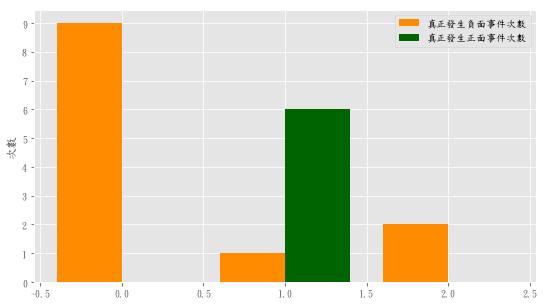

In [15]:
k_range = [0,1,2]
k_cluster_date_dict_3 = {}
k_cluster_pos_count_dict_3 = {}
k_cluster_neg_count_dict_3 = {}
for f in k_range:
    k_cluster_date_dict_3[str(f)] = []
    k_cluster_pos_count_dict_3[str(f)] = 0
    k_cluster_neg_count_dict_3[str(f)] = 0
for i in range(len(date_list)):
    date = date_list[i]
    for k in k_range:
        if y_pred_num[i] == k:
            k_cluster_date_dict_3[str(k)].append(date)
            break
# print(k_cluster_date_dict_3)
# print(len(y_pred_num))

import matplotlib
import matplotlib.pyplot as plt
for rn in real_negative_date_list:
    for i in k_range:
        if rn in k_cluster_date_dict_3[str(i)]:
            k_cluster_neg_count_dict_3[str(i)] += 1
for rp in real_positive_date_list:
    for i in k_range:
        if rn in k_cluster_date_dict_3[str(i)]:
            k_cluster_pos_count_dict_3[str(i)] += 1
print(k_cluster_neg_count_dict_3)
print(k_cluster_pos_count_dict_3)
plt.subplots(figsize=(9,5)) #圖形大小
font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '10'} #字型設定
plt.rc('font', **font) #字型設定 # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False) #字型設定
plt.bar(k_range,list(k_cluster_neg_count_dict_3.values()),color = 'darkorange', label='真正發生負面事件次數', width = -0.4, align = "edge")
plt.bar(k_range,list(k_cluster_pos_count_dict_3.values()),color = 'darkgreen', label='真正發生正面事件次數', width = 0.4, align = "edge")
#print(sort_tw_place)
plt.legend(loc='upper right')
plt.ylabel('次數')
yaxis = np.arange(0,10,1)
xaxis = np.arange(-0.5,2.5,0.5)
plt.yticks(yaxis)
plt.legend()
plt.show()

10.假設檢定，目前分群是否真足以分出正負面事件?(以判斷正確率80%為基準，顯著水準為0.05)
找出最能帶鰾正負面事件群集的群組，檢測日期若在分組內的則視為正確判斷(1)，反之則視為(0)，使用stats.ttest_1samp計算t值、p值

In [16]:
#t-test
largest_pos_k_cluster = max(k_cluster_pos_count_dict_3, key=k_cluster_pos_count_dict_3.get)
largest_neg_k_cluster = max(k_cluster_neg_count_dict_3, key=k_cluster_neg_count_dict_3.get)
right_pos = k_cluster_pos_count_dict_3[str(largest_pos_k_cluster)]
rgiht_neg = k_cluster_neg_count_dict_3[str(largest_neg_k_cluster)]
rgiht_all = right_pos + rgiht_neg
all_test_date = len(real_negative_date_list) + len(real_positive_date_list)
test_list_1 = []
#print(rgiht_all,all_test_date)
for i in range(rgiht_all):
    test_list_1.append(1)
for j in range(all_test_date-rgiht_all):
    test_list_1.append(0)
print(test_list_1)
from scipy import stats
stats.ttest_1samp(test_list_1,0.8)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]


Ttest_1sampResult(statistic=0.3687817782917153, pvalue=0.7168430154990375)

結果發現此樣本在判斷正確率80%為基準，顯著水準為0.05的情況下，t值為0.3687817782917153，右尾p值為1-0.716=0.284。因0.284>0.05，我們沒有足夠的證據拒絕此虛無假設，故此結果並不顯著。在顯著水準為0.05的情況下，用此組正負關鍵字的分類分出正面及負面事件的成功率未大於0.8。

10.再手工假設檢定一次，目前分群是否真足以分出正負面事件?(以判斷正確率80%為基準，顯著水準為0.05)

人工進行t檢定: 檢測此正負關鍵字的分類是否能透過K MEANS分出正面及負面事件，設μ為成功分出正負面新聞的機率，p為抽樣結果
虛無假設: μ = 0.8 ；對立假設: μ >0.8；顯著水準為0.05
p = 15/18, q = 3/18
t(0.05,17) = 1.74
拒絕域為p > 0.9688
因15/18= 0.8333 < 0.9688，我們沒有足夠的證據拒絕此虛無假設，故此結果並不顯著。在顯著水準為0.05的情況下，用此組正負關鍵字的分類分出正面及負面事件的成功率未大於0.8。

調降期待和顯著水準(以判斷正確率70%為基準，顯著水準為0.1)
虛無假設: μ = 0.7 ；對立假設: μ >0.7；顯著水準為0.1
p = 15/18, q = 3/18
t(0.1,17) = 1.33
拒絕域為p > 0.8478
因15/18= 0.8333 < 0.8478，我們沒有足夠的證據拒絕此虛無假設，故此結果並不顯著。在顯著水準為0.1的情況下，用此組正負關鍵字的分類分出正面及負面事件的成功率未大於0.7

11.結論
此分群結果不符合我的期待，故此組正負關鍵詞分群方式需要再調整

12.未來展望
目前只有測試單一的正負關鍵詞組合的分辨成效，未來希望能用程式自動生成不同組合的關鍵詞，再進行kmeans計算，最終透過t檢定找出能促成顯著結果的詞彙組合。